<a href="https://colab.research.google.com/github/charvit/mu_genaiapp/blob/main/Copy_of_AI_Based_Aircraft_Anomaly_Detection_in_Aviation_Systems_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Create folder in Drive
!mkdir -p /content/drive/MyDrive/NASA_Aviation_Dataset

# Move to that folder
%cd /content/drive/MyDrive/NASA_Aviation_Dataset

# Download dataset ONCE
!wget -O DASHlink_full_fourclass_raw_comp.npz "https://c3.ndc.nasa.gov/dashlink/static/media/dataset/DASHlink_full_fourclass_raw_comp.npz"
!wget -O DASHlink_full_fourclass_raw_meta.csv "https://c3.ndc.nasa.gov/dashlink/static/media/dataset/DASHlink_full_fourclass_raw_meta.csv"


Mounted at /content/drive
/content/drive/MyDrive/NASA_Aviation_Dataset
--2025-12-16 10:16:40--  https://c3.ndc.nasa.gov/dashlink/static/media/dataset/DASHlink_full_fourclass_raw_comp.npz
Resolving c3.ndc.nasa.gov (c3.ndc.nasa.gov)... 128.102.105.71, 2001:4d0:6311:2227:f9fc:6489:8a93:3a83
Connecting to c3.ndc.nasa.gov (c3.ndc.nasa.gov)|128.102.105.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1759319547 (1.6G)
Saving to: ‘DASHlink_full_fourclass_raw_comp.npz’

DASHlink_full_fourc 100%[===================>]   1.64G  17.2MB/s    in 1m 53s  

2025-12-16 10:18:33 (14.9 MB/s) - ‘DASHlink_full_fourclass_raw_comp.npz’ saved [1759319547/1759319547]

--2025-12-16 10:18:34--  https://c3.ndc.nasa.gov/dashlink/static/media/dataset/DASHlink_full_fourclass_raw_meta.csv
Resolving c3.ndc.nasa.gov (c3.ndc.nasa.gov)... 128.102.105.71, 2001:4d0:6311:2227:f9fc:6489:8a93:3a83
Connecting to c3.ndc.nasa.gov (c3.ndc.nasa.gov)|128.102.105.71|:443... connected.
HTTP request sent, a

In [ ]:
import numpy as np
DATA_PATH = './'
data = np.load(DATA_PATH + "DASHlink_full_fourclass_raw_comp.npz", allow_pickle=True)
print("Keys inside dataset:", data.files)

Keys inside dataset: ['data', 'label']


In [ ]:
X = data['data']
y = data['label']

print("X Shape:", X.shape)
print("y Shape:", y.shape)

X Shape: (99837, 160, 20)
y Shape: (99837,)


In [ ]:
import numpy as np

unique, counts = np.unique(y, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"Class {cls}: {cnt} samples")


Class 0.0: 89663 samples
Class 1.0: 7013 samples
Class 2.0: 2207 samples
Class 3.0: 954 samples


In [ ]:
if "feature_names" in data.files:
    print(data["feature_names"])
else:
    print("No feature names found inside NPZ.")



No feature names found inside NPZ.


In [ ]:

feature_names = [
    "Indicated_Airspeed",
    "True_Airspeed",
    "Groundspeed",
    "Altitude",
    "Radio_Altitude",
    "Pitch_Angle",
    "Roll_Angle",
    "Heading",
    "Vertical_Speed",
    "Angle_of_Attack",
    "N1_RPM",
    "N2_RPM",
    "Fuel_Flow",
    "Exhaust_Gas_Temperature",
    "Flap_Position",
    "Spoiler_Position",
    "Aileron_Position",
    "Elevator_Position",
    "Rudder_Position",
    "Thrust_Lever_Position"
]

len(feature_names)


20

In [ ]:
import pandas as pd

# Example: Convert first sample to a DataFrame with feature column names
sample_df = pd.DataFrame(X[0], columns=feature_names)
sample_df.head()


,Indicated_Airspeed,True_Airspeed,Groundspeed,Altitude,Radio_Altitude,Pitch_Angle,Roll_Angle,Heading,Vertical_Speed,Angle_of_Attack,N1_RPM,N2_RPM,Fuel_Flow,Exhaust_Gas_Temperature,Flap_Position,Spoiler_Position,Aileron_Position,Elevator_Position,Rudder_Position,Thrust_Lever_Position
0,81.261190,82.652336,-8.111792,1969.6174,155.57140,-2.109358,-0.692778,-4.952854,3065.0,0.01794,-2.109358,0.006664,70.74118,985.42550,-3.662261,0.785912,-0.390141,-1.081870,0.972379,12.625183
1,79.604095,81.015700,-7.644611,1955.6995,154.51205,-2.109358,-0.867216,-5.198349,3065.0,0.01950,-2.109358,0.007448,70.71775,985.52030,-3.665276,0.046774,-0.756234,-0.704820,0.770077,11.893839
2,81.302110,80.770200,-7.552573,1940.0267,153.32867,-2.109358,-1.424093,-4.830105,3065.0,0.01872,-2.109358,0.009604,70.70276,985.41650,-3.940319,0.804820,-1.325632,-0.240446,0.543937,12.559112
3,82.345470,83.900276,-8.395265,1924.5493,150.88818,-2.109358,-1.141912,-4.625526,3065.0,0.01677,-2.109358,0.009408,70.74159,984.81710,-4.275129,1.077102,-0.326884,-0.191627,1.062817,10.542998
4,81.874930,82.754620,-7.854284,1905.3670,150.69461,-2.109358,-0.724660,-4.400490,3065.0,0.01677,-2.109358,0.009408,70.57045,985.23065,-4.241483,1.654806,0.129545,-0.528425,0.867628,9.713539


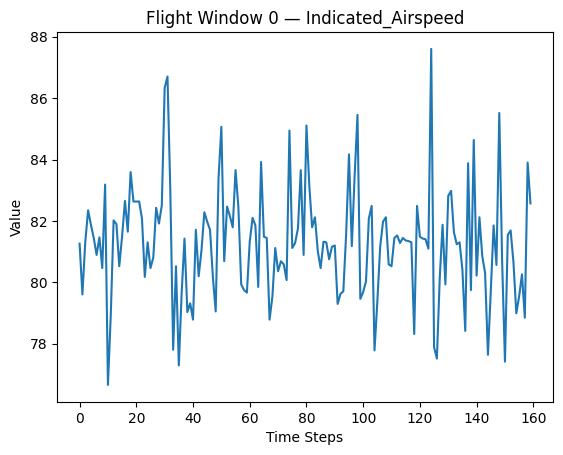

In [ ]:
import matplotlib.pyplot as plt

feature = "Indicated_Airspeed"
feature_id = feature_names.index(feature)

plt.plot(X[0][:, feature_id])
plt.title(f"Flight Window 0 — {feature}")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.show()


In [ ]:
print("X Shape:", X.shape)
print("y Shape:", y.shape)
print("Number of samples:", len(X))
print("Time steps per sample:", X.shape[1])
print("Number of features:", X.shape[2])


X Shape: (99837, 160, 20)
y Shape: (99837,)
Number of samples: 99837
Time steps per sample: 160
Number of features: 20


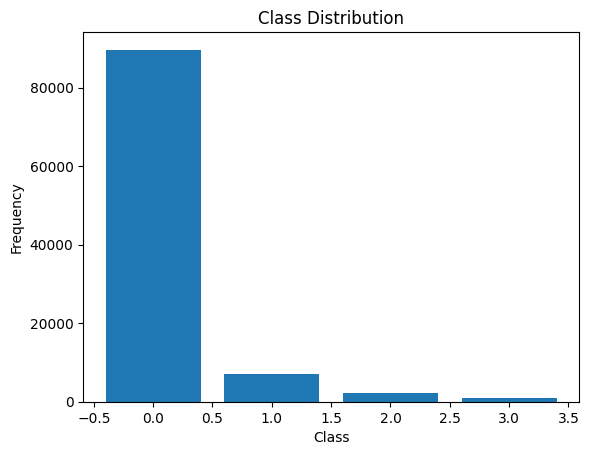

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

unique, counts = np.unique(y, return_counts=True)

plt.bar(unique, counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


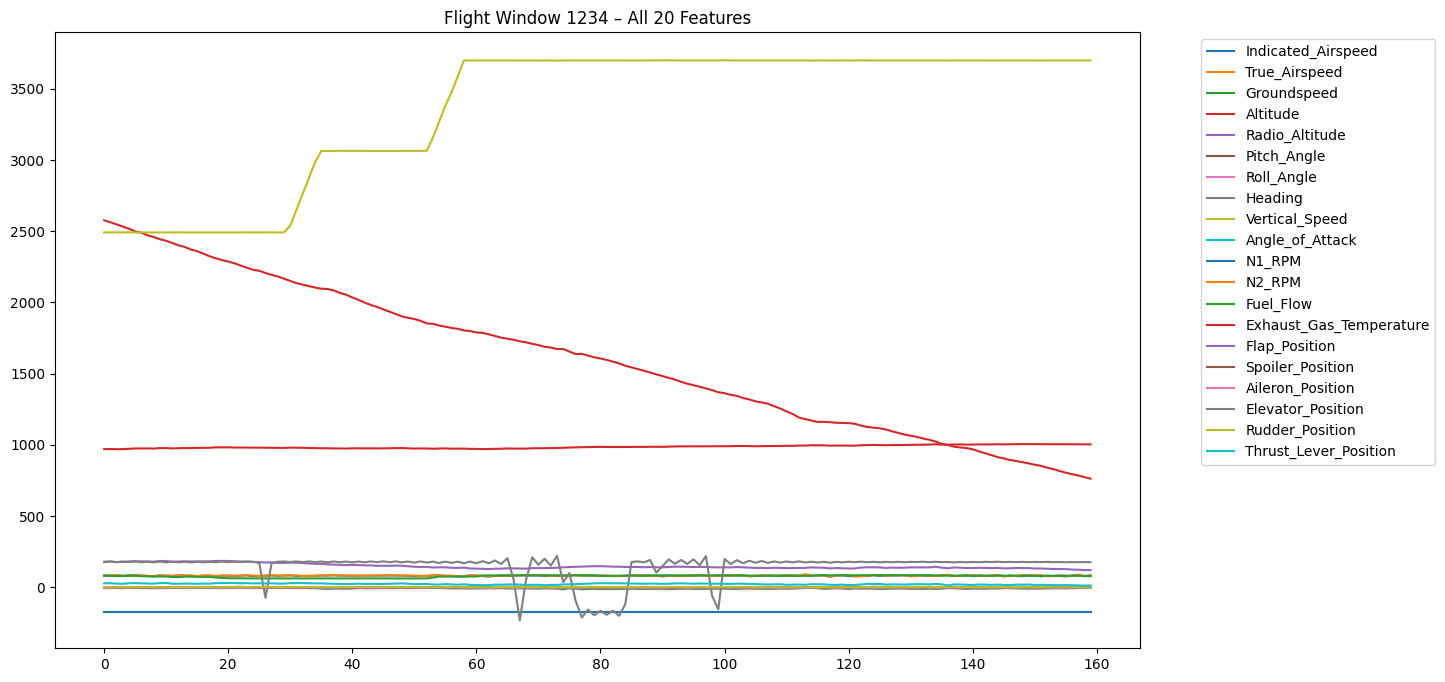

In [ ]:
import matplotlib.pyplot as plt

sample_id = 1234
plt.figure(figsize=(14, 8))

for i in range(20):
    plt.plot(X[sample_id][:, i], label=feature_names[i])

plt.title(f"Flight Window {sample_id} – All 20 Features")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import pandas as pd

df = pd.DataFrame(X.reshape(-1, X.shape[2]), columns=feature_names)
df.describe()


,Indicated_Airspeed,True_Airspeed,Groundspeed,Altitude,Radio_Altitude,Pitch_Angle,Roll_Angle,Heading,Vertical_Speed,Angle_of_Attack,N1_RPM,N2_RPM,Fuel_Flow,Exhaust_Gas_Temperature,Flap_Position,Spoiler_Position,Aileron_Position,Elevator_Position,Rudder_Position,Thrust_Lever_Position
count,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07,1.597392e+07
mean,8.416449e+01,8.250033e+01,-5.030629e+00,1.593955e+03,1.296070e+02,-2.798447e+00,-5.721000e-01,-4.529907e+00,3.516135e+03,9.223231e-03,-6.260690e+00,-9.667213e-04,7.554156e+01,9.873640e+02,-2.431182e+00,1.565681e-02,-3.530437e-01,-1.549096e+01,8.755446e-01,1.250264e+01
std,6.776032e+00,5.723180e+00,2.947523e+00,8.462115e+02,1.636054e+01,1.067956e+02,4.239992e+00,7.309691e+00,4.078605e+02,7.633446e-02,1.074590e+02,7.517956e-02,6.910865e+00,3.263081e+01,1.949569e+00,3.460834e+00,8.311961e+00,1.092154e+02,3.510426e-01,7.552455e+00
min,4.190000e+01,4.190000e+01,-1.813725e+01,-1.701416e+02,6.361842e+01,-1.799987e+02,-2.663377e+01,-4.190000e+01,-2.007720e-08,-7.987200e-01,-1.799987e+02,-4.014080e-01,2.791523e+01,-9.268940e+00,-1.640007e+01,-4.316291e+01,-6.406691e+01,-2.903081e+02,-4.034420e+00,-9.693694e-01
25%,8.291829e+01,8.113844e+01,-6.880437e+00,1.068818e+03,1.203806e+02,-8.604431e+01,-3.159860e+00,-5.832546e+00,3.620000e+03,-7.019999e-03,-8.903256e+01,-4.311996e-03,7.386763e+01,9.747401e+02,-3.566625e+00,-8.344205e-01,-9.995754e-01,-1.078633e+02,9.405535e-01,6.891892e+00
50%,8.453447e+01,8.263188e+01,-4.870905e+00,1.523651e+03,1.245417e+02,-6.064405e+00,-5.236102e-01,-4.257282e+00,3.654000e+03,1.699849e-15,-7.119093e+00,-2.450147e-17,7.838791e+01,9.893707e+02,-2.371448e+00,3.150895e-02,-1.587089e-01,-3.373892e+01,9.897160e-01,1.109764e+01
75%,8.610974e+01,8.404348e+01,-3.108507e+00,2.001839e+03,1.313254e+02,1.189152e+02,2.064329e+00,-2.600185e+00,3.680000e+03,1.521000e-02,1.129386e+02,3.920000e-03,8.008841e+01,1.003735e+03,-1.299770e+00,8.951587e-01,7.324417e-01,9.050368e+01,1.023582e+00,1.689974e+01
max,1.245299e+02,1.243253e+02,1.343198e+01,1.403922e+04,2.642353e+02,1.789440e+02,2.597106e+01,4.070940e+01,3.766000e+03,7.983300e-01,1.789440e+02,4.012120e-01,9.698553e+01,1.088547e+03,1.139875e+01,5.014801e+01,7.240260e+01,2.895814e+02,1.852262e+00,6.326201e+01


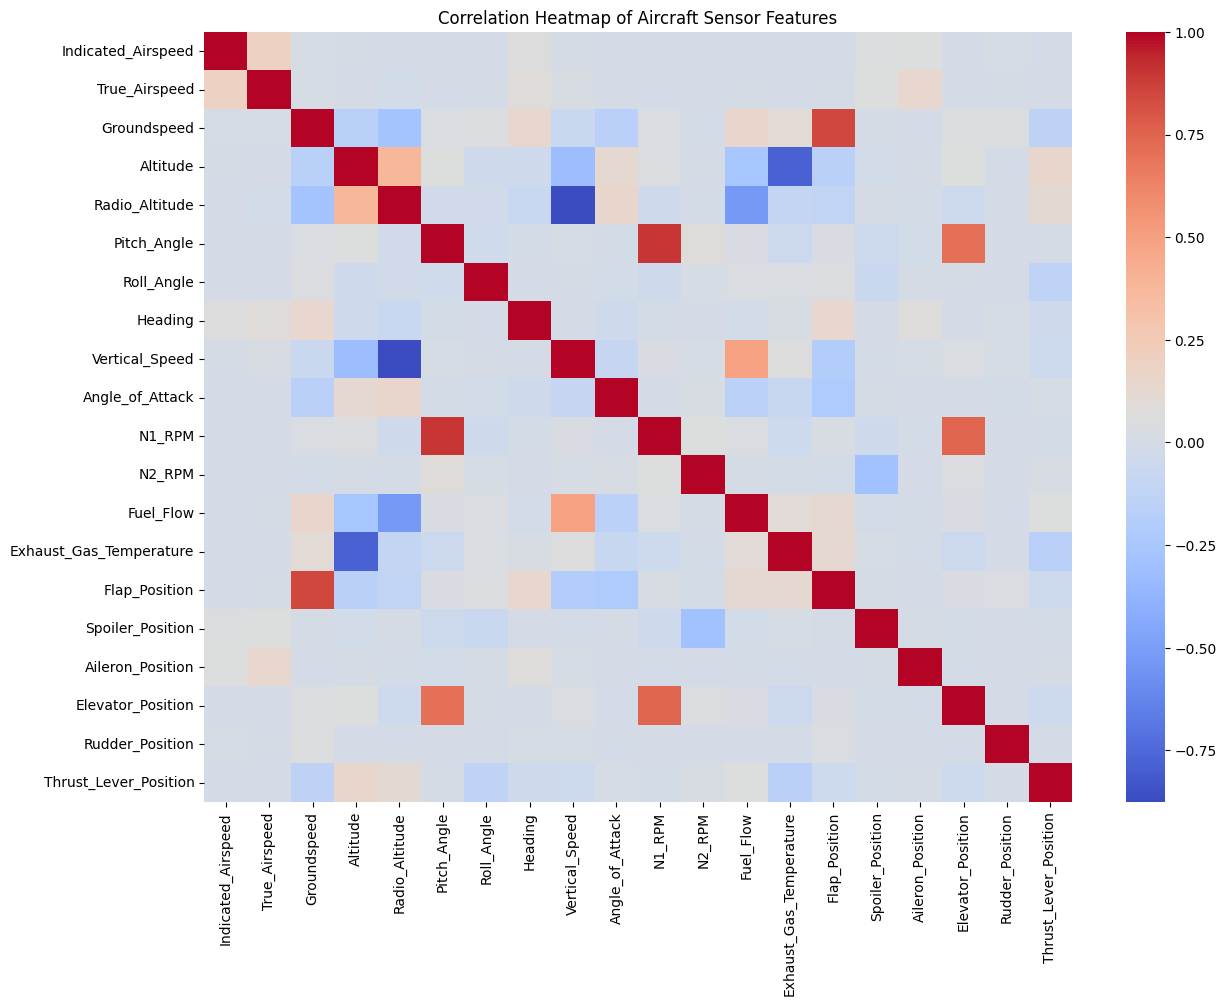

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap of Features
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Aircraft Sensor Features")
plt.show()


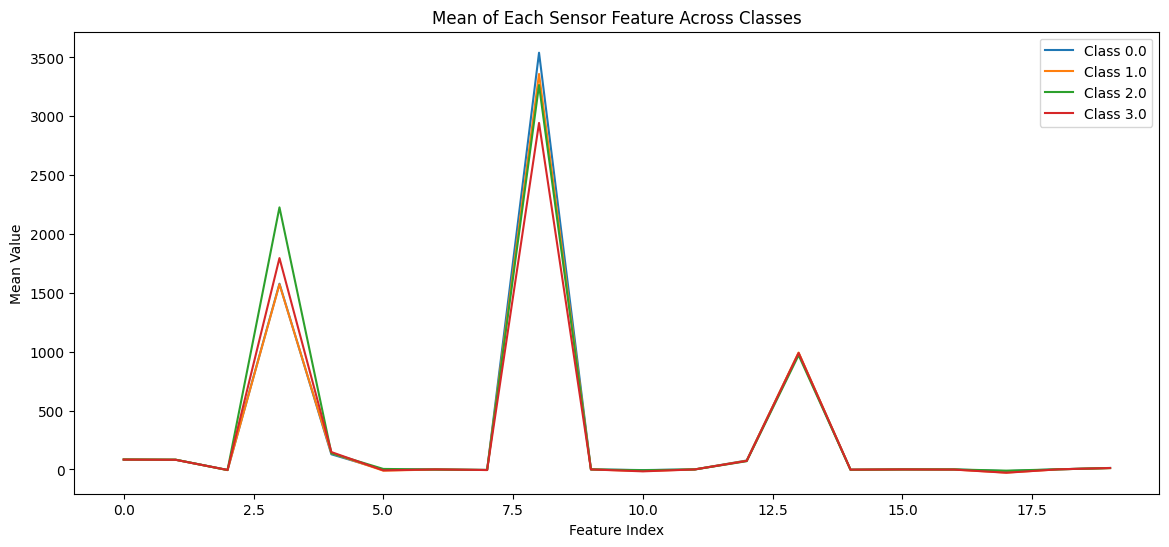

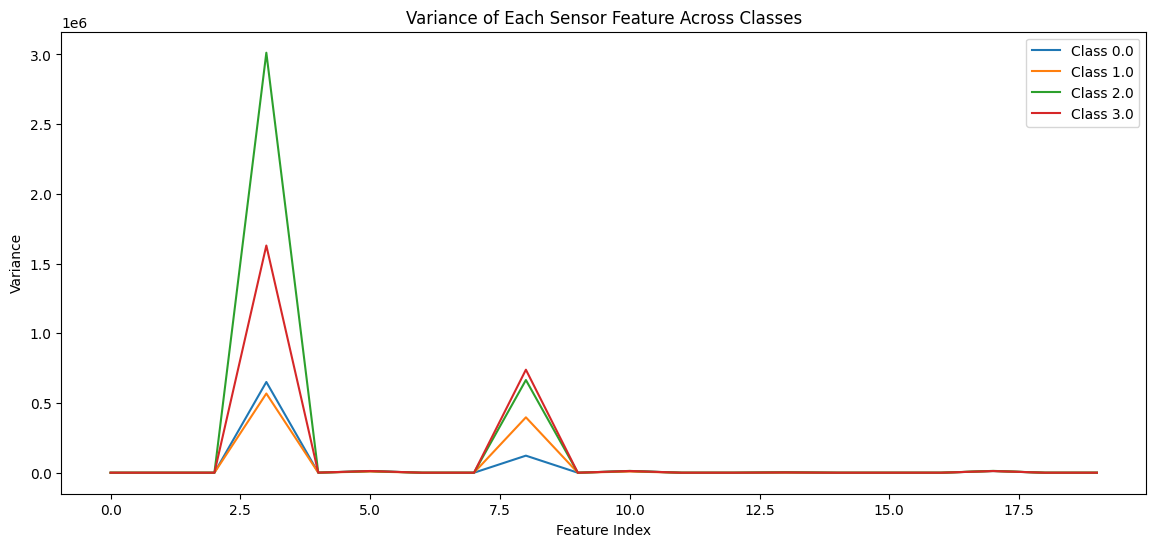

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_features = X.shape[2]

# Calculate mean and variance for each class
class_means = {}
class_vars = {}

for cls in np.unique(y):
    class_data = X[y == cls]
    class_means[cls] = class_data.mean(axis=(0,1))
    class_vars[cls] = class_data.var(axis=(0,1))

# Plot mean of each feature across classes
plt.figure(figsize=(14, 6))
for cls in class_means:
    plt.plot(class_means[cls], label=f"Class {cls}")
plt.title("Mean of Each Sensor Feature Across Classes")
plt.xlabel("Feature Index")
plt.ylabel("Mean Value")
plt.legend()
plt.show()

# Plot variance of each feature across classes
plt.figure(figsize=(14, 6))
for cls in class_vars:
    plt.plot(class_vars[cls], label=f"Class {cls}")
plt.title("Variance of Each Sensor Feature Across Classes")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()


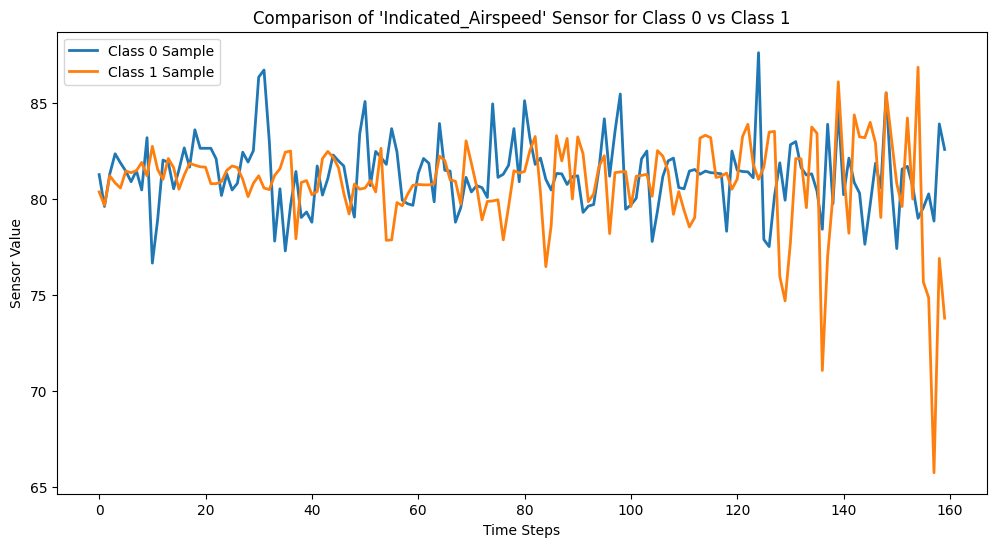

In [ ]:
feature = "Indicated_Airspeed"
fid = feature_names.index(feature)

# Pick one sample from each class
sample_0 = X[y == 0][0][:, fid]
sample_1 = X[y == 1][0][:, fid]

plt.figure(figsize=(12, 6))
plt.plot(sample_0, label="Class 0 Sample", linewidth=2)
plt.plot(sample_1, label="Class 1 Sample", linewidth=2)
plt.title(f"Comparison of '{feature}' Sensor for Class 0 vs Class 1")
plt.xlabel("Time Steps")
plt.ylabel("Sensor Value")
plt.legend()
plt.show()



In [ ]:
# -----------------------------
# SECTION 3: DATA PREPROCESSING
# -----------------------------

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("Starting preprocessing...")

# Convert to float32 for TensorFlow compatibility
X = X.astype(np.float32)
y = y.astype(np.int32)

# -----------------------------
# 1️⃣ Reshape data for normalization
# -----------------------------
num_samples, time_steps, num_features = X.shape

X_reshaped = X.reshape(-1, num_features)  # (samples*time_steps, features)

# -----------------------------
# 2️⃣ Apply Standard Scaling (Z-score normalization)
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)

# Reshape back to 3D for model
X_scaled = X_scaled.reshape(num_samples, time_steps, num_features)

print("Normalization complete.")
print("Shape after scaling:", X_scaled.shape)

# -----------------------------
# 3️⃣ Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train/Test Split Done.")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# -----------------------------
# 4️⃣ Optional: Shuffle the training data
# -----------------------------
shuffle_idx = np.random.permutation(len(X_train))
X_train = X_train[shuffle_idx]
y_train = y_train[shuffle_idx]

print("Preprocessing completed successfully!")


Starting preprocessing...
Normalization complete.
Shape after scaling: (99837, 160, 20)
Train/Test Split Done.
X_train: (79869, 160, 20)
X_test: (19968, 160, 20)
y_train: (79869,)
y_test: (19968,)
Preprocessing completed successfully!


In [ ]:
# -----------------------------------------
# SECTION 4: CNN + BiLSTM + ATTENTION MODEL
# -----------------------------------------

import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv1D, Bidirectional, LSTM, Dense, Dropout, LayerNormalization
)
from tensorflow.keras.models import Model
import numpy as np

# ======================================================
# FIXED & FULLY COMPATIBLE ATTENTION LAYER (WORKING)
# ======================================================
class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        feature_dim = input_shape[-1]

        self.W = self.add_weight(
            shape=(feature_dim, feature_dim),
            initializer="random_normal",
            trainable=True,
            name="W"
        )
        self.b = self.add_weight(
            shape=(feature_dim,),
            initializer="zeros",
            trainable=True,
            name="b"
        )
        self.u = self.add_weight(
            shape=(feature_dim,),
            initializer="random_normal",
            trainable=True,
            name="u"
        )

        super(Attention, self).build(input_shape)

    def call(self, inputs):
        # inputs → (batch, timesteps, features)

        # Score computation
        score = tf.tanh(tf.tensordot(inputs, self.W, axes=[[2], [0]]) + self.b)

        # Reduce using u → produces attention score for each timestep
        score = tf.tensordot(score, self.u, axes=[[2], [0]])  # (batch, timesteps)

        # Softmax over timesteps
        attention_weights = tf.nn.softmax(score, axis=1)      # (batch, timesteps)
        attention_weights = tf.expand_dims(attention_weights, -1)  # (batch, timesteps, 1)

        # Weighted sum of inputs
        weighted_output = inputs * attention_weights
        return tf.reduce_sum(weighted_output, axis=1)  # (batch, features)


# ======================================================
# BUILD THE MODEL
# ======================================================

time_steps = X_train.shape[1]
num_features = X_train.shape[2]
num_classes = len(np.unique(y))

inputs = Input(shape=(time_steps, num_features))

# 1️⃣ CNN Layer
x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
x = LayerNormalization()(x)

# 2️⃣ BiLSTM Layer
x = Bidirectional(LSTM(64, return_sequences=True))(x)

# 3️⃣ Attention Layer
x = Attention()(x)

# 4️⃣ Dense Layers
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# ======================================================
# COMPILE MODEL
# ======================================================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 160, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 160, 64)        │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_3           │ (None, 160, 64)        │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 160, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_3 (Attention)         │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,236 (372.02 KB)

 Trainable params: 95,236 (372.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# -----------------------------------------
# SECTION 5: MODEL TRAINING
# -----------------------------------------

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Early stopping: stops training when validation accuracy stops improving
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Optional: save the best model automatically
checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

# -----------------------------
# TRAIN THE MODEL
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

print("Training completed successfully!")


Epoch 1/30
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.9216 - loss: 0.2517
Epoch 1: val_accuracy improved from -inf to 0.95386, saving model to best_model.keras
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 475s 233ms/step - accuracy: 0.9216 - loss: 0.2516 - val_accuracy: 0.9539 - val_loss: 0.1355
Epoch 2/30
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9589 - loss: 0.1257
Epoch 2: val_accuracy improved from 0.95386 to 0.95862, saving model to best_model.keras
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 460s 230ms/step - accuracy: 0.9589 - loss: 0.1257 - val_accuracy: 0.9586 - val_loss: 0.1223
Epoch 3/30
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.9651 - loss: 0.1071
Epoch 3: val_accuracy improved from 0.95862 to 0.96087, saving model to best_model.keras
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 531s 245ms/step - accuracy: 0.9651 - loss: 0.1071 - val_accuracy: 0.9609 - val_loss: 0.1189
Epoch 4/30
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9670 - loss: 0.0998
Epoch 4